<a href="https://colab.research.google.com/github/123-Navyasri/VemulawadaNavyasri-DA-Assignment/blob/main/Lab_5_2203A52188.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
                       mean    median           std  skewness  kurtosis
Balance       76485.889288  97198.54  62397.405202 -0.141088 -1.489267
CreditScore     650.528800    652.00     96.653299 -0.071596 -0.426113
Point Earned    606.515100    605.00    225.924839  0.008343 -1.193784


<ipython-input-1-6bb293b42dab>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, ax=axes[0], palette="pastel")
<ipython-input-1-6bb293b42dab>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Geography", data=df, ax=axes[1], palette="pastel")


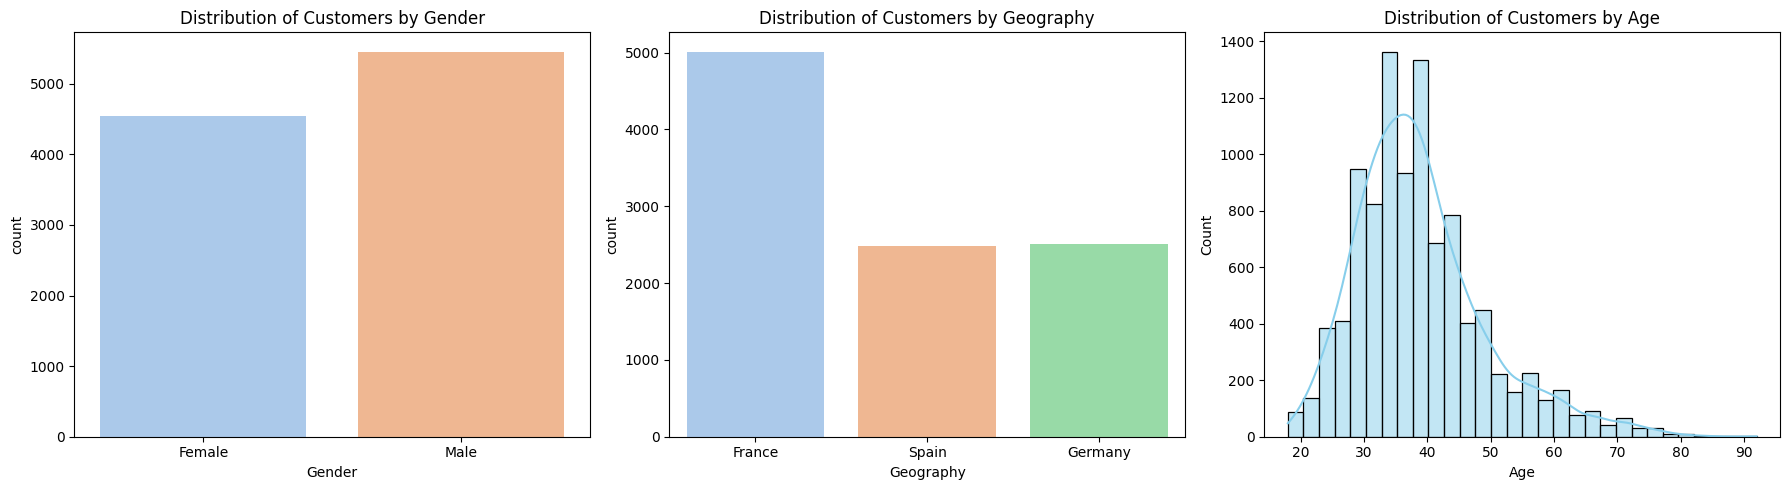

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data (1).csv"
df = pd.read_csv(file_path)

# Selecting numerical columns of interest
numerical_columns = ["Balance", "CreditScore", "Point Earned"]

# Calculating summary statistics
summary_stats = df[numerical_columns].agg(["mean", "median", "std"]).transpose()

# Calculating skewness and kurtosis
summary_stats["skewness"] = df[numerical_columns].apply(skew)
summary_stats["kurtosis"] = df[numerical_columns].apply(kurtosis)

# Display summary statistics
print("Summary Statistics:\n", summary_stats)

# Setting up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distribution of Gender
sns.countplot(x="Gender", data=df, ax=axes[0], palette="pastel")
axes[0].set_title("Distribution of Customers by Gender")

# Plot distribution of Geography
sns.countplot(x="Geography", data=df, ax=axes[1], palette="pastel")
axes[1].set_title("Distribution of Customers by Geography")

# Plot distribution of Age
sns.histplot(df["Age"], bins=30, kde=True, ax=axes[2], color="skyblue")
axes[2].set_title("Distribution of Customers by Age")

# Display plots
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data (1).csv"
df = pd.read_csv(file_path)
# Compute min, max, and mean transaction counts for active vs. inactive customers
active_status_stats = df.groupby("IsActiveMember")["Point Earned"].agg(["min", "max", "mean"])

# Renaming index for clarity
active_status_stats.index = ["Inactive Customers", "Active Customers"]

# Display the statistics
print("Transaction Counts for Active vs. Inactive Customers:\n", active_status_stats)


Transaction Counts for Active vs. Inactive Customers:
                     min   max        mean
Inactive Customers  119  1000  607.675397
Active Customers    206  1000  605.422831


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


# Compute min, max, and mean transaction counts for active vs. inactive customers
active_status_stats = df.groupby("IsActiveMember")["Point Earned"].agg(["min", "max", "mean"])

# Renaming index for clarity
active_status_stats.index = ["Inactive Customers", "Active Customers"]

# Display the statistics
print("Transaction Counts for Active vs. Inactive Customers:\n", active_status_stats)

# Compute correlation matrix for credit score, balance, and transaction count
correlation_matrix = df[["CreditScore", "Balance", "Point Earned"]].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Compare balance and transaction activity between churned and non-churned customers
churn_comparison = df.groupby("Exited")[["Balance", "Point Earned"]].agg(["mean", "median"])
print("Balance and Transaction Activity Comparison:\n", churn_comparison)

# Compute probability of low credit score and high balance
low_credit_threshold = df["CreditScore"].quantile(0.25)
high_balance_threshold = df["Balance"].quantile(0.75)
low_credit_high_balance = df[(df["CreditScore"] <= low_credit_threshold) & (df["Balance"] >= high_balance_threshold)].shape[0] / df.shape[0]
print("Probability of Low Credit Score and High Balance:", low_credit_high_balance)


Transaction Counts for Active vs. Inactive Customers:
                     min   max        mean
Inactive Customers  119  1000  607.675397
Active Customers    206  1000  605.422831
Correlation Matrix:
               CreditScore   Balance  Point Earned
CreditScore      1.000000  0.006268      0.000077
Balance          0.006268  1.000000      0.014608
Point Earned     0.000077  0.014608      1.000000
Balance and Transaction Activity Comparison:
              Balance            Point Earned       
                mean     median         mean median
Exited                                             
0       72742.750663   92063.06   607.044084  603.0
1       91109.476006  109344.23   604.448479  610.5
Probability of Low Credit Score and High Balance: 0.0638
